In [7]:
# Add the parent directory to the path so Python can find modules in the utils folder
import sys, os
sys.path.append(os.path.abspath(".."))

import xarray as xr
import matplotlib.pyplot as plt

# Import the temporal aggregation functions from our new module
from utils.temporal_stats import (
    aggregate_to_daily,
    aggregate_by_month,
    aggregate_by_season,
    aggregate_by_year,
    group_by_weather_type  # This is a stub for future functionality
)

from data_loading.load_data import load_ensemble_any_latlon


# Load the test dataset (adjust path if needed)
test_path_h = os.path.join("..", "data", "total_precipitation_2017010*.nc")
ds_h = load_ensemble_any_latlon(test_path_h)
test_path_d = os.path.join("..", "data", "SPARTACUS2-DAILY_RR_2016.nc")
ds_d = xr.open_dataset(test_path_d)

# Test daily aggregation (using "sum" and replacing missing values -999 with NaN)
daily = aggregate_to_daily(ds_h, "precipitation", method="sum", compute_ens_mean=False)
print("Daily Aggregation:")
print(daily)

# Test monthly aggregation
monthly = aggregate_by_month(ds_d, "RR", method="sum", missing_value=-999)
print("Monthly Aggregation:")
print(monthly)

# Test seasonal aggregation
seasonal = aggregate_by_season(ds_d, "RR", method="sum", missing_value=-999)
print("Seasonal Aggregation:")
print(seasonal)

# Test annual aggregation
annual = aggregate_by_year(ds_d, "RR", method="sum", missing_value=-999)
print("Annual Aggregation:")
print(annual)




Daily Aggregation:
<xarray.DataArray 'precipitation' (time: 2, lat: 492, lon: 594, member: 11)> Size: 51MB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.05285645e-03, 2.67028809e-05, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 3.81469727e-06, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+0

/home/lar/anaconda3/envs/ara_env/lib/python3.13/site-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


Monthly Aggregation:
<xarray.DataArray 'RR' (time: 12, y: 329, x: 584)> Size: 18MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..

/home/lar/anaconda3/envs/ara_env/lib/python3.13/site-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Annual Aggregation:
<xarray.DataArray 'RR' (time: 1, y: 329, x: 584)> Size: 2MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], shape=(1, 329, 584))
Coordinates:
    lambert_conformal_conic  float64 8B nan
    lat                      (y, x) float32 769kB 46.16 46.17 ... 49.11 49.11
    lon                      (y, x) float32 769kB 9.609 9.622 ... 17.37 17.38
  * x                        (x) int32 2kB 112500 113500 ... 694500 695500
  * y                        (y) int32 1kB 258500 259500 ... 585500 586500
  * time                     (time) datetime64[ns] 8B 2016-12-31
Attributes:
    cell_method:     time: sum (7:00 CET to 7:00 CET day+1)
    description:     daily sum (derived from daily sums measured by climatolo...
    esri_pe_string:  PROJCS["ETRS89 / Austria Lambert",GEOGCS["ETRS89

In [2]:
ds_h

<xarray.Dataset> Size: 2GB
Dimensions:        (member: 11, time: 48, lat: 492, lon: 594)
Coordinates:
  * member         (member) object 88B '00' '01' '02' '03' ... '08' '09' '10'
    lon            (lat, lon) float32 1MB 5.498 5.526 5.554 ... 22.05 22.07 22.1
  * time           (time) datetime64[ns] 384B 2017-01-01 ... 2017-01-02T23:00:00
Dimensions without coordinates: lat
Data variables:
    latitude       (time, lat, lon, member) float32 617MB 42.98 42.98 ... 51.82
    precipitation  (time, lat, lon, member) float64 1GB 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    history:  Fri Jan 31 09:51:14 2025: ncrename -v lat,latitude -v lon,longi...
    NCO:      netCDF Operators version 5.1.9 (Homepage = http://nco.sf.net, C...

In [9]:
print(daily.isel(member=3))

<xarray.DataArray 'precipitation' (time: 2, lat: 492, lon: 594)> Size: 5MB
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [5.72204590e-05, 1.52587891e-04, 3.89099121e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.05175781e-05, 2.67028809e-05, 3.05175781e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.57763672e-05, 4.19616699e-05, 4.19616699e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        

In [6]:
daily_spatial_mean = daily.mean(dim=["member"])

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(daily_spatial_mean.time, daily_spatial_mean, label="Daily Precipitation Sum (Spatial Average)")
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.title("Daily Aggregation Test")
plt.legend()
plt.show()

ValueError: 'member' not found in array dimensions ('time', 'lat', 'lon')

In [4]:
daily_mean = daily.mean(dim=["time"])

daily_mean

<xarray.DataArray 'precipitation' (lat: 492, lon: 594)> Size: 2MB
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.60737471e-04, 1.85533003e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.50903043e-04, 3.46790661e-07, 8.66976651e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.56055797e-06, 2.42753462e-06, 1.26578591e-05],
       ...,
       [2.53850763e-04, 2.61653553e-04, 3.82683494e-04, ...,
        3.46790661e-07, 3.46790661e-07, 1.73395330e-07],
       [4.12854281e-04, 4.00890004e-04, 3.74360518e-04, ...,
        3.46790661e-07, 1.73395330e-07, 3.46790661e-07],
       [5.98213889e-04, 5.74111938e-04, 5.17238270e-04, ...,
        3.46790661e-07, 3.46790661e-07, 3.46790661e-07]], shape=(492, 594))
Coordinates:
    lon      (lat, lon) float32 1MB 5.498 5.526 5.554 5.582 ... 22.05 22.07 22.1
Dimensions without coordinates: lat

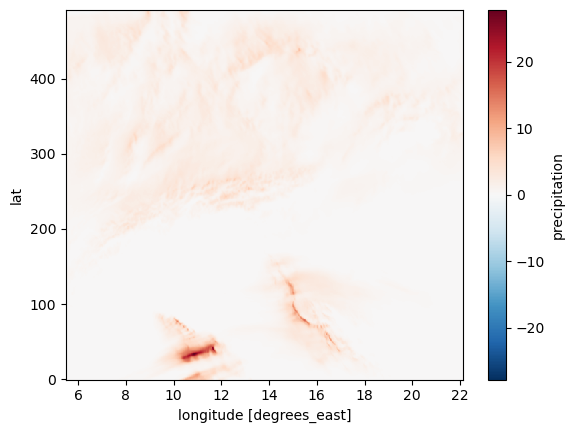

In [5]:
daily_mean.plot()

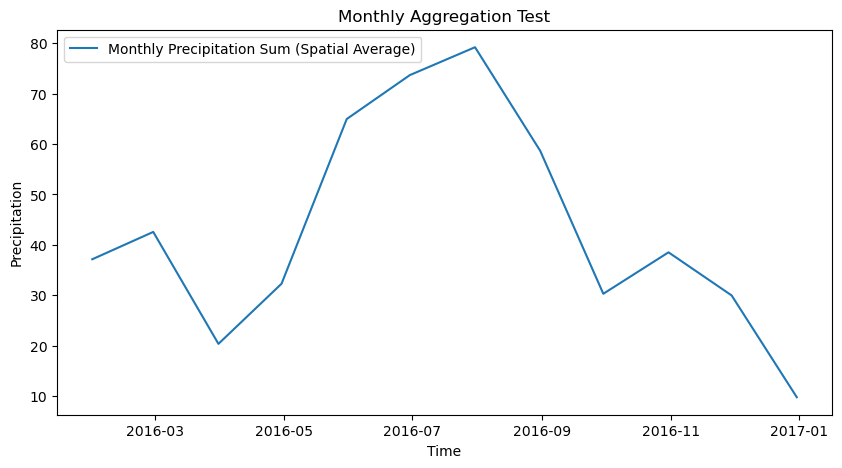

In [15]:
monthly_spatial_mean = monthly.mean(dim=["x", "y"])

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(monthly_spatial_mean.time, monthly_spatial_mean, label="Monthly Precipitation Sum (Spatial Average)")
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.title("Monthly Aggregation Test")
plt.legend()
plt.show()

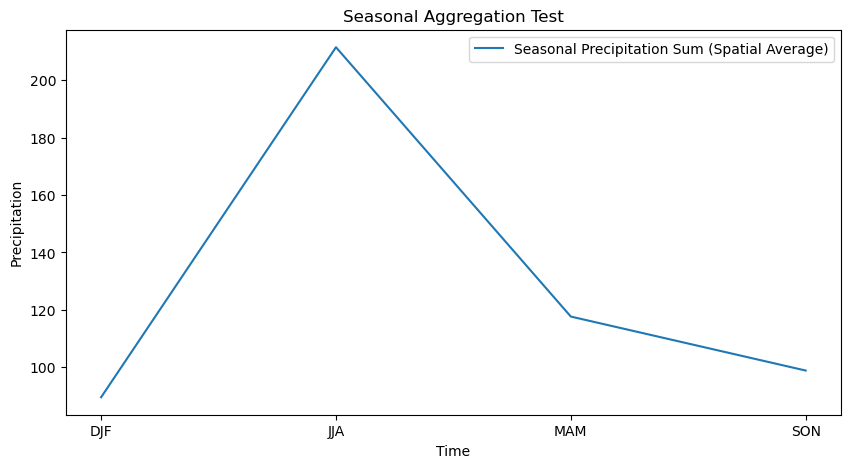

In [17]:
seasonal_spatial_mean = seasonal.mean(dim=["x", "y"])

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(seasonal_spatial_mean.season, seasonal_spatial_mean, label="Seasonal Precipitation Sum (Spatial Average)")
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.title("Seasonal Aggregation Test")
plt.legend()
plt.show()

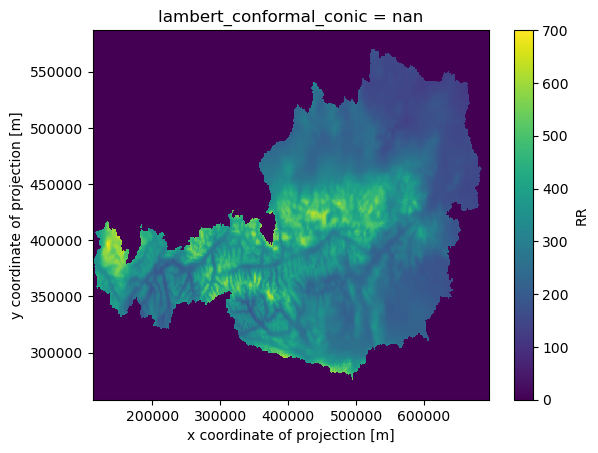

In [18]:
seasonal_mean = seasonal.mean(dim=["season"])

seasonal_mean.plot()